In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import missingno as mno
import plotly.express as px



In [3]:
ab=pd.read_csv(r"pubg-weapon-stats.csv")
ab.head()


,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [4]:
ab.head(4)

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8


In [5]:
ab.tail(3)

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
41,Sickle,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Machete,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Punch,Melee,NaN,18,1,NaN,NaN,0.33,10,4,55.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

In [7]:
print("ab:{}".format(len(ab.index)))

ab:44


In [8]:
ab.isnull().any()

Weapon Name              False
Weapon Type              False
Bullet Type               True
Damage                   False
Magazine Capacity        False
Range                     True
Bullet Speed              True
Rate of Fire             False
Shots to Kill (Chest)    False
Shots to Kill (Head)     False
Damage Per Second        False
Fire Mode                False
BDMG_0                    True
BDMG_1                    True
BDMG_2                    True
BDMG_3                    True
HDMG_0                    True
HDMG_1                    True
HDMG_2                    True
HDMG_3                    True
dtype: bool

<AxesSubplot:>

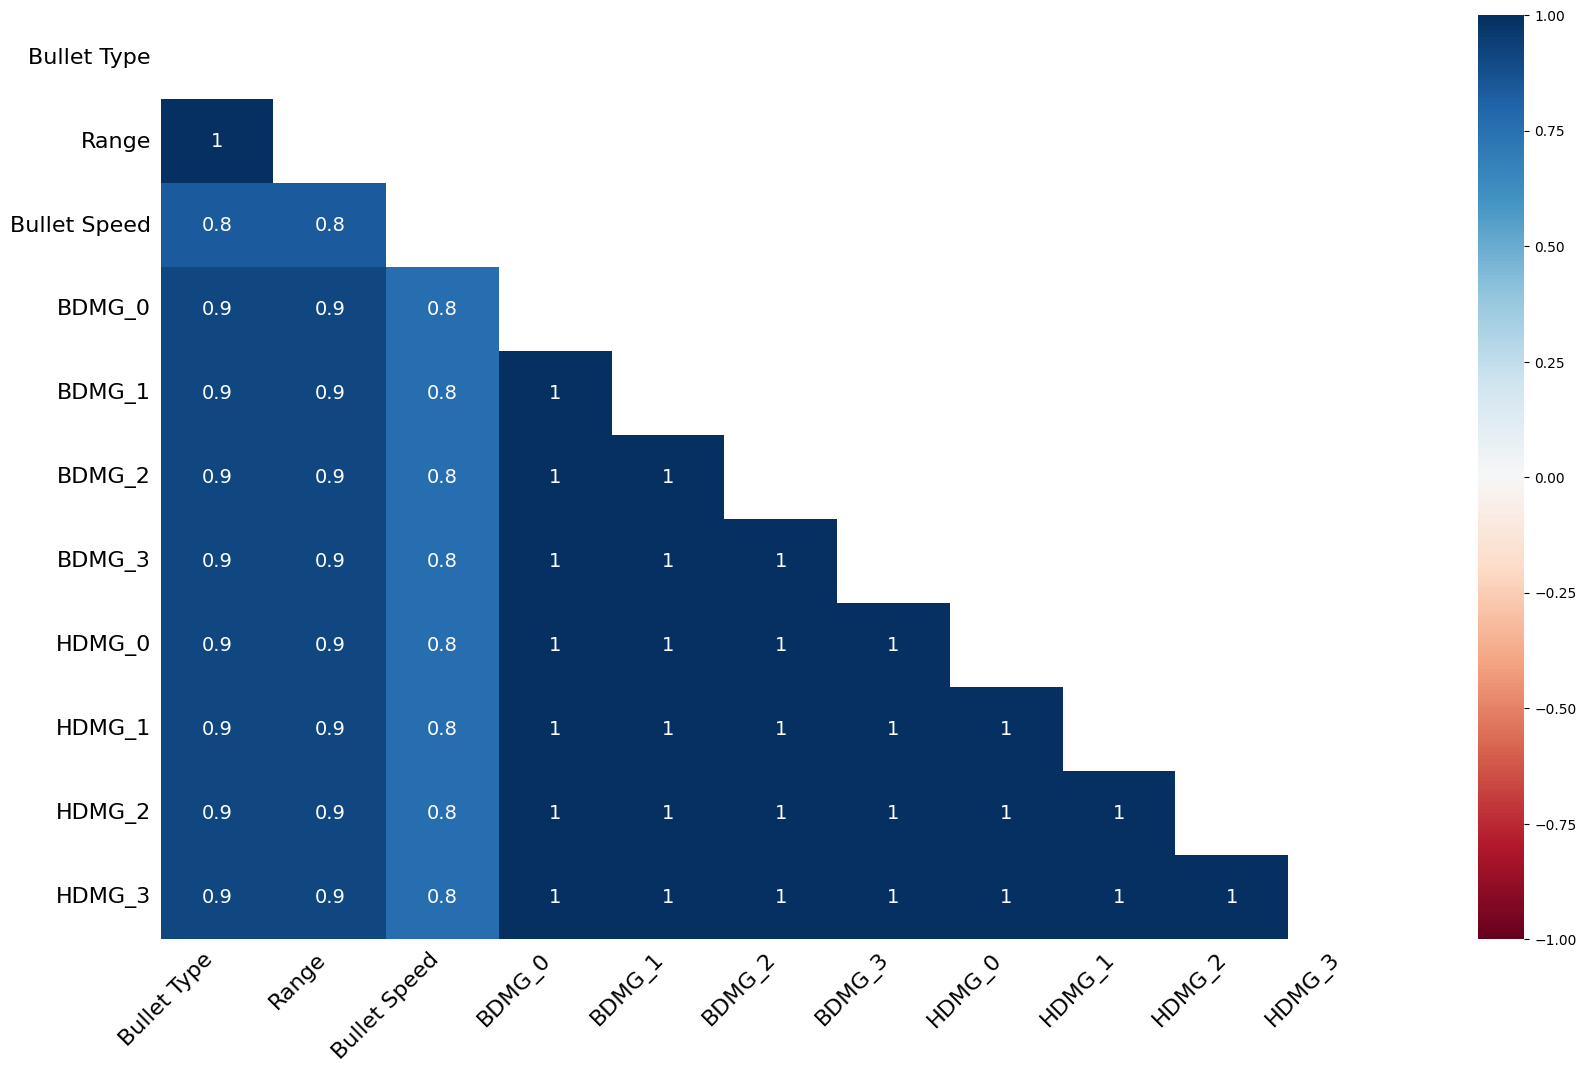

In [9]:
mno.heatmap(ab)

In [10]:
ab.dropna(axis=0,inplace=True)
ab

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.0800,4,2,612.00,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.0100,4,2,490.00,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.0860,4,2,547.00,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.0100,4,2,490.00,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,0.0960,4,2,448.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,0.0100,4,2,430.00,"Single, Burst",43.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,0.0960,4,2,466.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

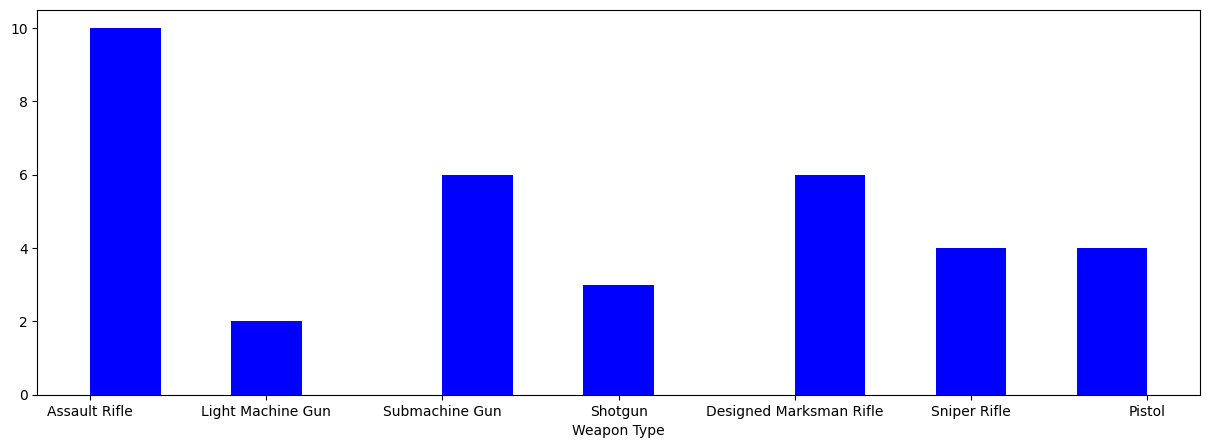

In [83]:
plt.figure(figsize=(15,5))
plt.hist(ab['Weapon Type'],bins=15,color='blue')
plt.xlabel('Weapon Type')
plt.ylable('frequency')
plt.title('No. of guns')



Text(0.5, 1.0, 'Magazine Capacity')

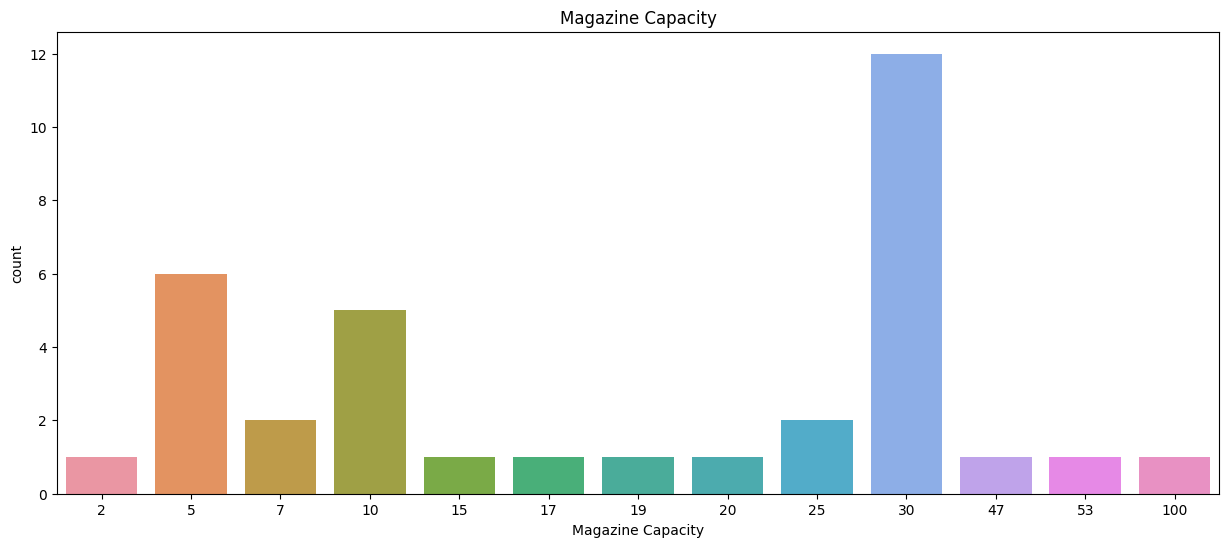

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Magazine Capacity',data=ab)
plt.title('Magazine Capacity')

<AxesSubplot:xlabel='Weapon Type', ylabel='Magazine Capacity'>

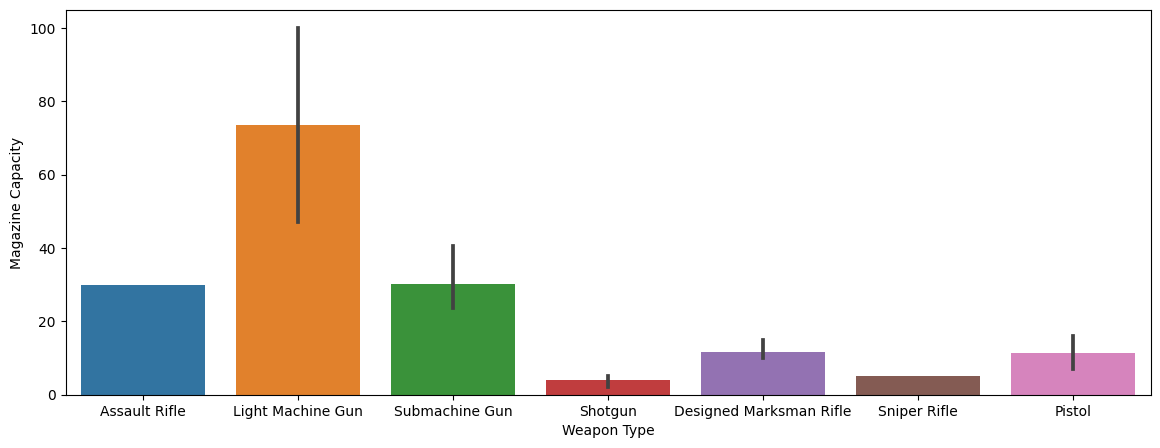

In [15]:
plt.figure(figsize=(14,5))
sns.barplot(x='Weapon Type',y='Magazine Capacity',data=ab)

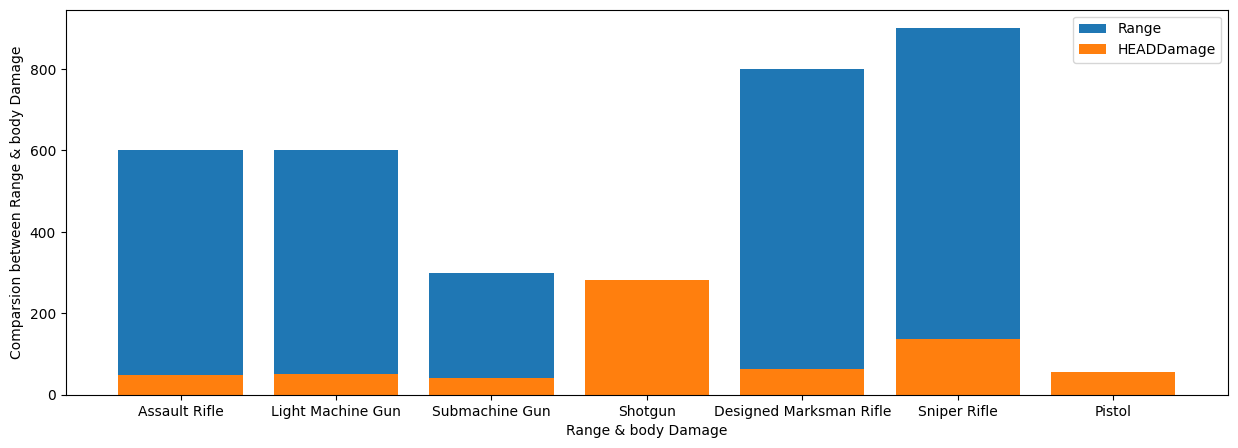

In [18]:
plt.figure(figsize=(15,5))
plt.bar(ab['Weapon Type'],ab['Range'],label='Range')
plt.bar(ab['Weapon Type'],ab['BDMG_0'],label='HEADDamage')
plt.xlabel( 'Range & body Damage')
plt.ylabel('Comparsion between Range & body Damage')
plt.legend()


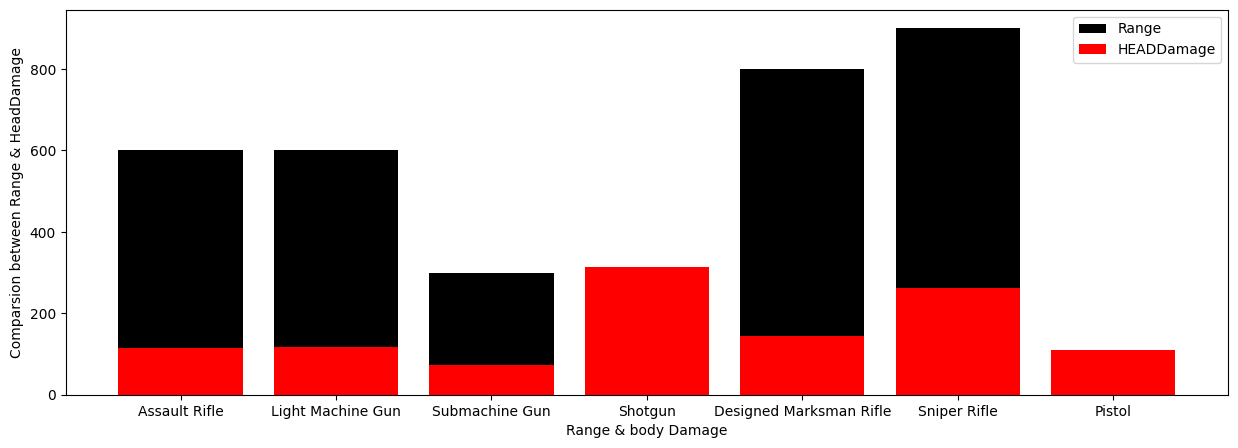

In [25]:
plt.figure(figsize=(15,5))
plt.bar(ab['Weapon Type'],ab['Range'],label='Range',color='black')
plt.bar(ab['Weapon Type'],ab['HDMG_0'],label='HEADDamage',color='r')
plt.xlabel( 'Range & body Damage')
plt.ylabel('Comparsion between Range & HeadDamage')
plt.legend()


In [27]:
px.bar(ab[['Weapon Type','BDMG_0','BDMG_1','BDMG_2','HDMG_0','HDMG_1','HDMG_2']].set_index('Weapon Type'),
labels={'value':'Damage'},barmode='group')

In [35]:
bc=ab.loc[ab['Weapon Type'].isin(['Assault Rifle'])]
bc.drop('Weapon Type',axis=1,inplace=True)
px.bar(bc.set_index('Weapon Name')[['BDMG_0','BDMG_1','BDMG_2','HDMG_0','HDMG_1','HDMG_2']]
,labels={'value':'Damage'},barmode='group',title='Summary')

In [40]:
ac=ab.groupby('Weapon Type')['Damage'].mean().reset_index()
ac

,Weapon Type,Damage
0,Assault Rifle,45.200000
1,Designed Marksman Rifle,50.833333
2,Light Machine Gun,48.000000
3,Pistol,38.500000
4,Shotgun,210.000000
5,Sniper Rifle,81.250000
6,Submachine Gun,34.000000


<AxesSubplot:xlabel='Weapon Type', ylabel='Damage'>

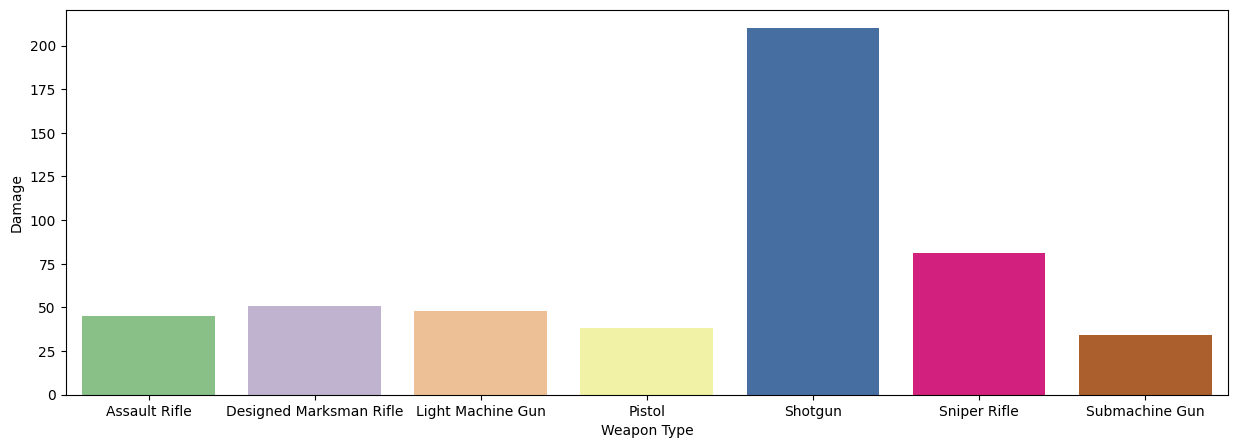

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Type',y='Damage',data=ac,palette='Accent')


In [44]:
ad=ab.groupby('Weapon Type')['Range'].mean().reset_index()
ad

,Weapon Type,Range
0,Assault Rifle,530.000000
1,Designed Marksman Rifle,733.333333
2,Light Machine Gun,500.000000
3,Pistol,25.000000
4,Shotgun,25.000000
5,Sniper Rifle,775.000000
6,Submachine Gun,208.333333


<AxesSubplot:xlabel='Weapon Type', ylabel='Range'>

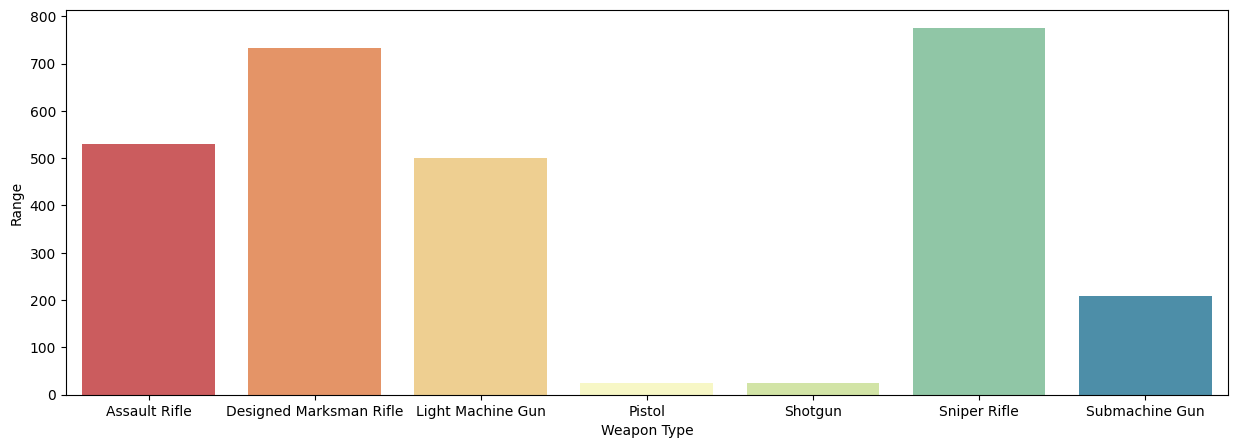

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Type',y='Range',data=ad,palette='Spectral')


In [47]:
ae=ab.groupby('Weapon Type')['Bullet Speed'].mean().reset_index()
ae

,Weapon Type,Bullet Speed
0,Assault Rifle,816.500000
1,Designed Marksman Rifle,763.000000
2,Light Machine Gun,815.000000
3,Pistol,333.750000
4,Shotgun,360.000000
5,Sniper Rifle,792.500000
6,Submachine Gun,301.666667


<AxesSubplot:xlabel='Weapon Type', ylabel='Bullet Speed'>

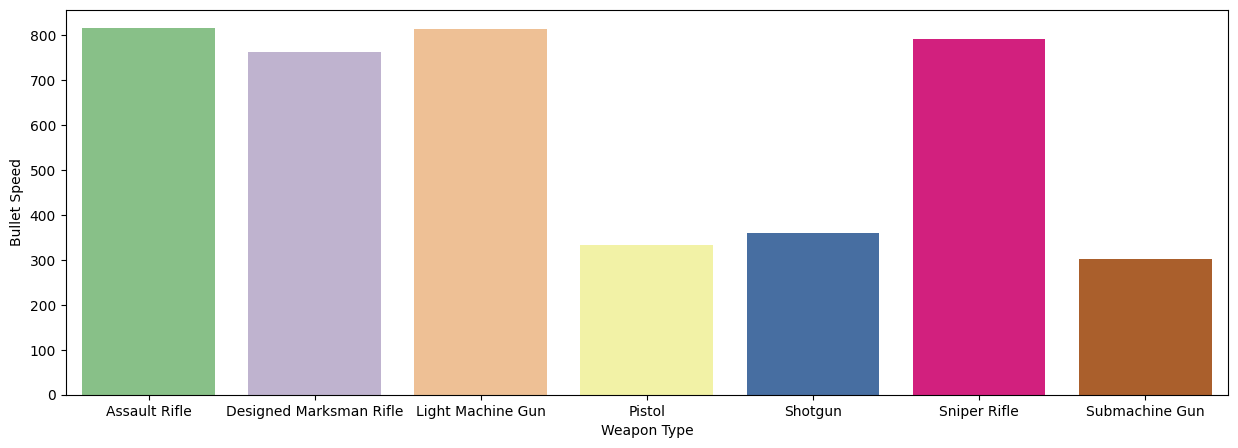

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Type',y='Bullet Speed',data=ae,palette='Accent')


In [49]:
af=ab.groupby('Weapon Type')['Rate of Fire'].mean().reset_index()
af

,Weapon Type,Rate of Fire
0,Assault Rifle,0.064600
1,Designed Marksman Rifle,0.023333
2,Light Machine Gun,0.092000
3,Pistol,0.177500
4,Shotgun,0.383333
5,Sniper Rifle,1.537500
6,Submachine Gun,0.070250


<AxesSubplot:xlabel='Weapon Type', ylabel='Rate of Fire'>

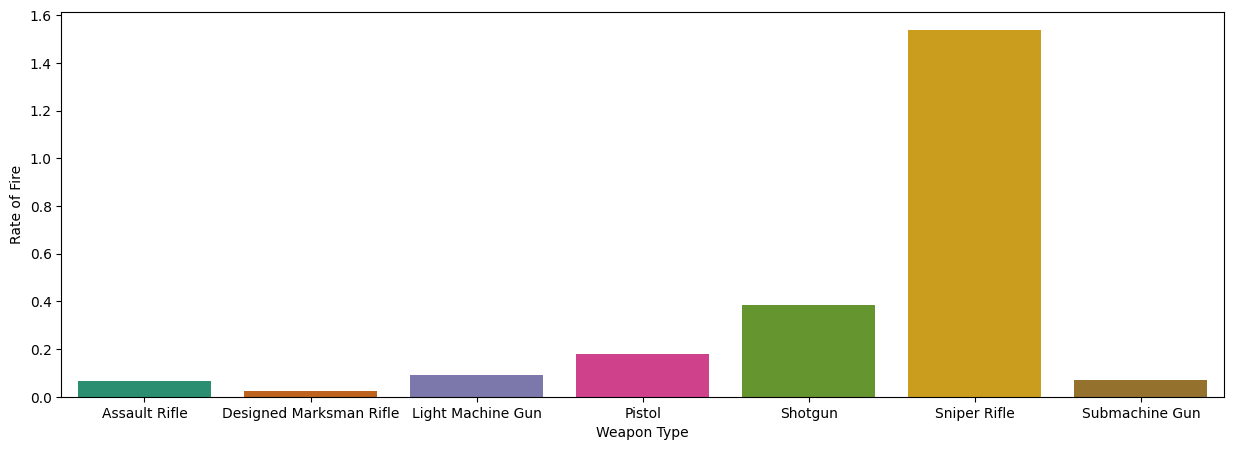

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Type',y='Rate of Fire',data=af,palette='Dark2')


In [58]:
a1 = ab[ab['Weapon Type'] == 'Assault Rifle'][['Weapon Name','Damage']].sort_values('Damage',ascending=False)
a1

,Weapon Name,Damage
0,Groza,49
1,AKM,49
3,MK47 Mutant,49
2,M762,47
4,AUG A3,43
5,SCAR-L,43
6,M416,43
7,M16A4,43
8,G36C,43
9,OBZ,43


<AxesSubplot:xlabel='Weapon Name', ylabel='Damage'>

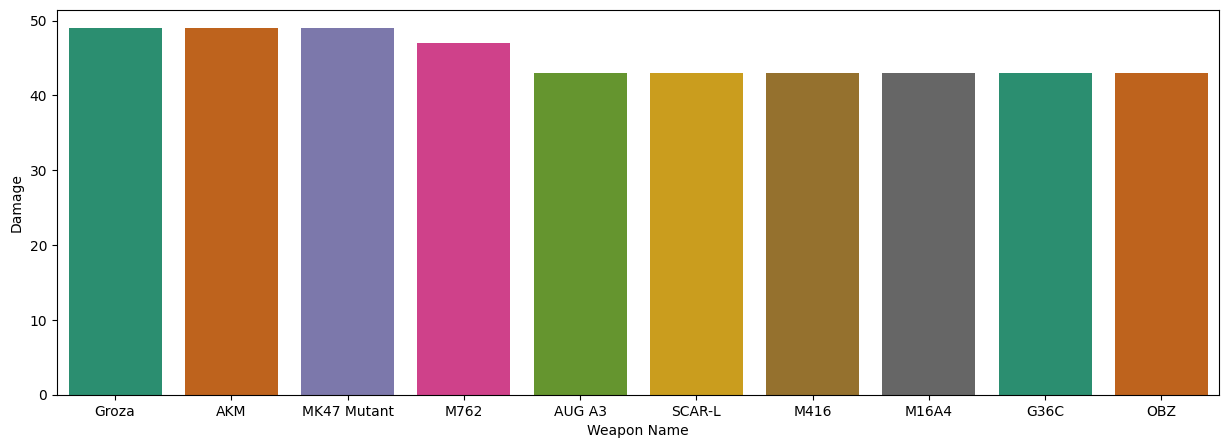

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Name',y='Damage',data=a1,palette='Dark2')


In [61]:
a2= ab[ab['Weapon Type'] == 'Sniper Rifle'][['Weapon Name','Damage']].sort_values('Damage',ascending=False)
a2

,Weapon Name,Damage
27,AWM,105
28,M24,79
29,Kar98,75
30,Win94,66


<AxesSubplot:xlabel='Weapon Name', ylabel='Damage'>

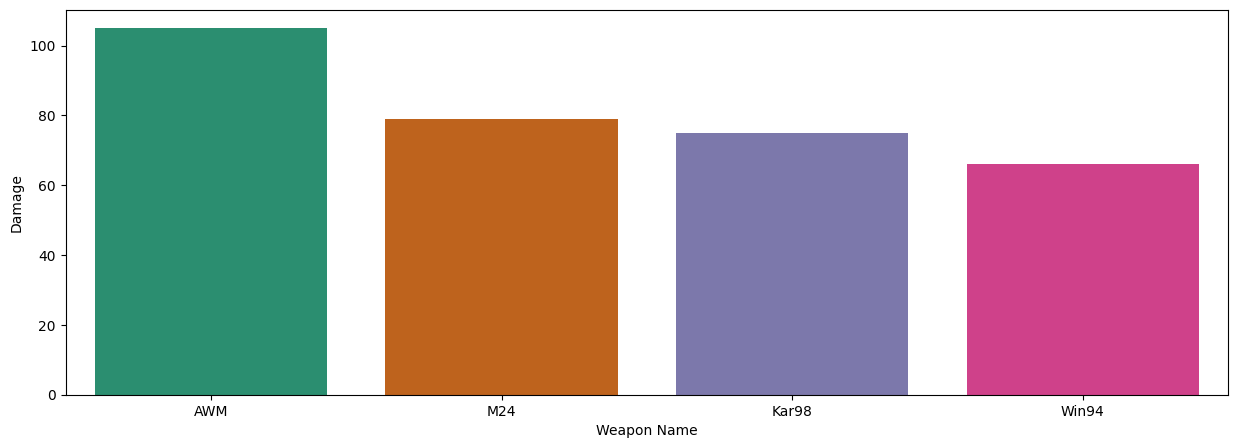

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Name',y='Damage',data=a2,palette='Dark2')


In [65]:
a3= ab[ab['Weapon Type'] == 'Assault Rifle'][['Weapon Name','Range']].sort_values('Range',ascending=False)
a3

,Weapon Name,Range
4,AUG A3,600.0
5,SCAR-L,600.0
6,M416,600.0
7,M16A4,600.0
8,G36C,600.0
9,OBZ,600.0
3,MK47 Mutant,500.0
0,Groza,400.0
1,AKM,400.0
2,M762,400.0


<AxesSubplot:xlabel='Weapon Name', ylabel='Range'>

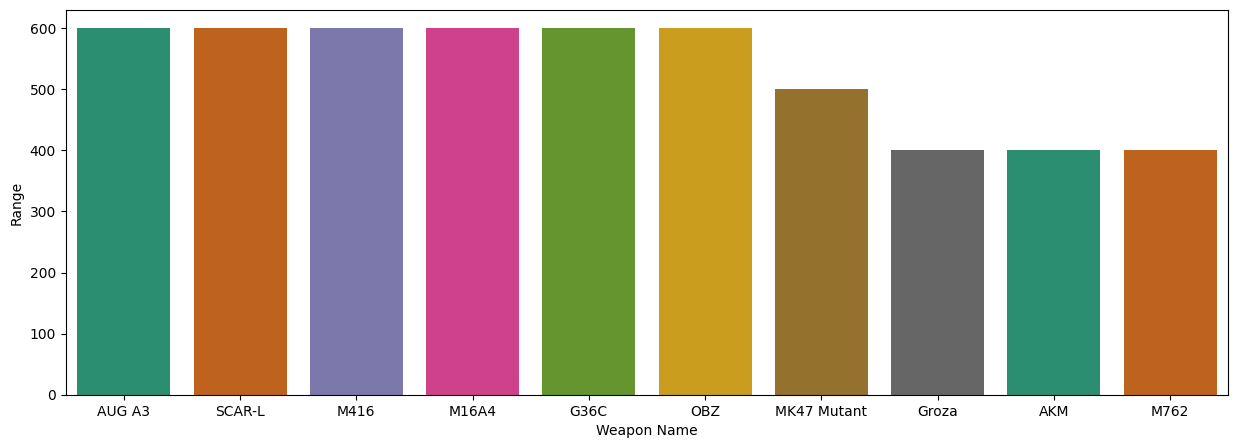

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Name',y='Range',data=a3,palette='Dark2')


In [67]:
a4= ab[ab['Weapon Type'] == 'Sniper Rifle'][['Weapon Name','Range']].sort_values('Range',ascending=False)
a4

,Weapon Name,Range
27,AWM,900.0
28,M24,800.0
29,Kar98,800.0
30,Win94,600.0


<AxesSubplot:xlabel='Weapon Name', ylabel='Range'>

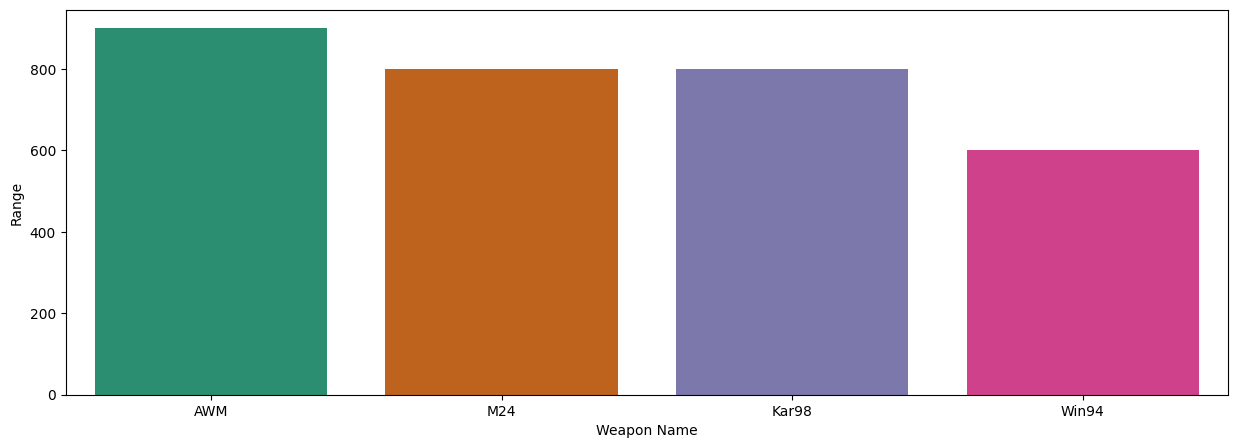

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Name',y='Range',data=a4,palette='Dark2')


In [72]:
a5= ab[ab['Weapon Type'] == 'Assault Rifle'][['Weapon Name','Bullet Speed']].sort_values('Bullet Speed',ascending=False)
a5

,Weapon Name,Bullet Speed
7,M16A4,900.0
6,M416,890.0
4,AUG A3,880.0
5,SCAR-L,880.0
8,G36C,880.0
9,OBZ,880.0
0,Groza,715.0
2,M762,715.0
3,MK47 Mutant,715.0
1,AKM,710.0


<AxesSubplot:xlabel='Weapon Name', ylabel='Bullet Speed'>

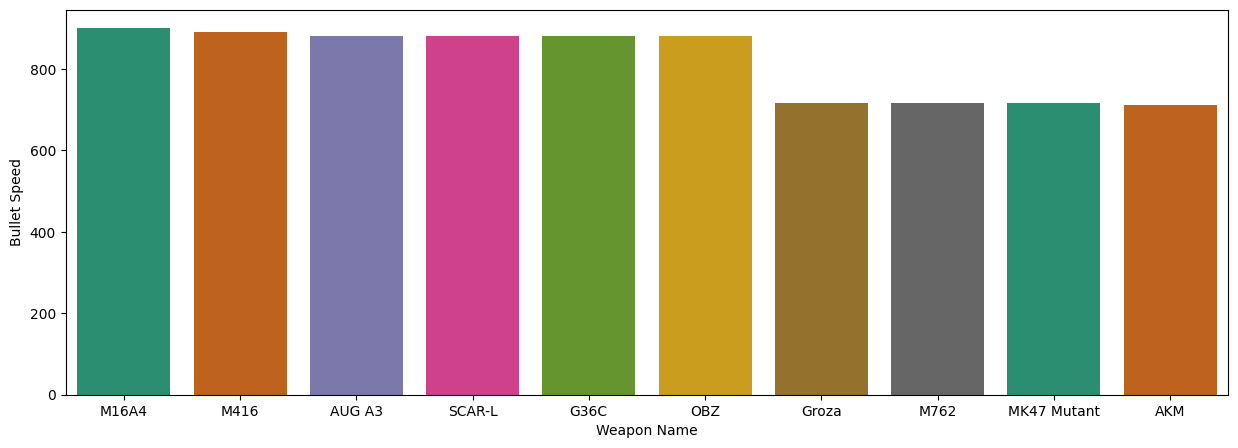

In [73]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Name',y='Bullet Speed',data=a5,palette='Dark2')


In [74]:
a6= ab[ab['Weapon Type'] == 'Sniper Rifle'][['Weapon Name','Bullet Speed']].sort_values('Bullet Speed',ascending=False)
a6

,Weapon Name,Bullet Speed
27,AWM,910.0
28,M24,790.0
29,Kar98,760.0
30,Win94,710.0


<AxesSubplot:xlabel='Weapon Name', ylabel='Bullet Speed'>

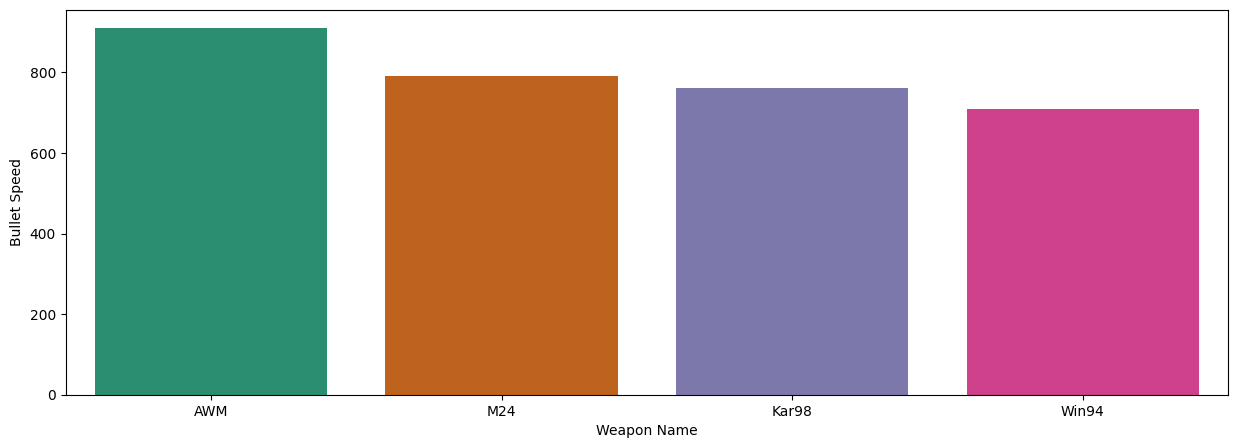

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Name',y='Bullet Speed',data=a6,palette='Dark2')


In [80]:
a7= ab[ab['Weapon Type'] == 'Assault Rifle'][['Weapon Name','Rate of Fire']].sort_values('Rate of Fire',ascending=False)
a7

,Weapon Name,Rate of Fire
5,SCAR-L,0.096
9,OBZ,0.096
2,M762,0.086
4,AUG A3,0.086
6,M416,0.086
8,G36C,0.086
0,Groza,0.080
1,AKM,0.010
3,MK47 Mutant,0.010
7,M16A4,0.010


<AxesSubplot:xlabel='Weapon Name', ylabel='Rate of Fire'>

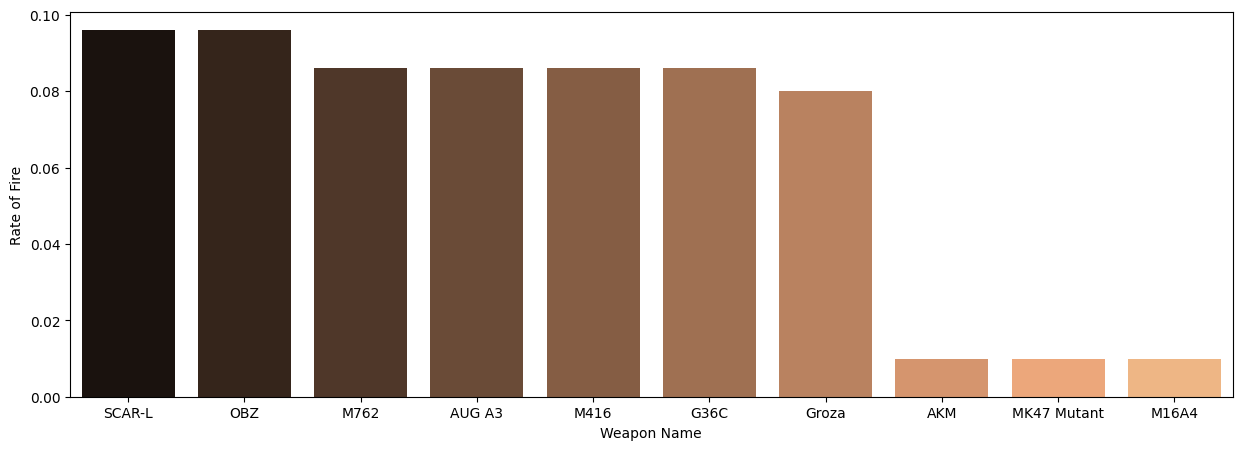

In [82]:
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Name',y='Rate of Fire',data=a7,palette='copper')
